In [1]:
import numpy as np
import matplotlib.pyplot as plt


%load_ext autoreload
%autoreload 2

import dataset 

In [2]:
import sys
sys.path.append("../twintest")

In [3]:
import causality as intest
import viz

In [4]:
# 'CE-Tueb', 'CE-Gauss', 'CE-Cha', 'CE-Multi', 'CE-Net'
data = dataset.load_dataset('CE-Tueb')

In [5]:
idx = 0

In [6]:
print('pair number', data.get_name(idx))

pair number 1


Causal direction: 1 means that X -> Y; and 0 the other way around.

In [7]:
x, y, target, _ = data[idx]
print('Causal direction:', target)
print('nb samples:', len(x))

Causal direction: 1
nb samples: 349


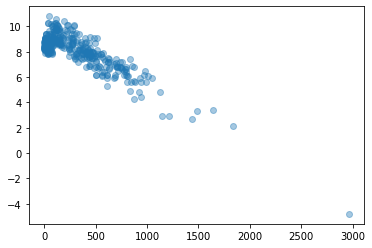

In [8]:
viz.pretty_scatter(x, y)

In [9]:
X_, Y_, _ = intest.partition_data(x, y)

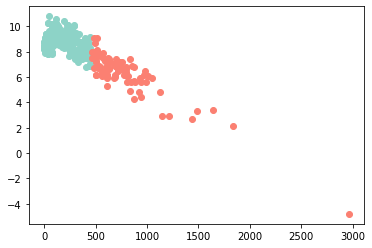

In [10]:
viz.plot_scatters(X_, Y_)

In [11]:
residuals, X_, Y_, models = intest.estimate_partitioned_models(x, y)
score, pairs = intest.find_max_discrp(residuals)

In [12]:
score

0.24020092226613973

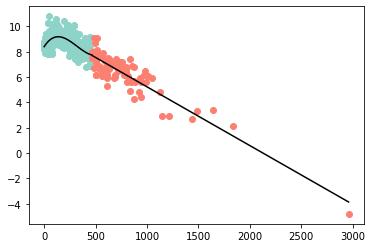

In [13]:
viz.plot_models(X_, Y_, models)

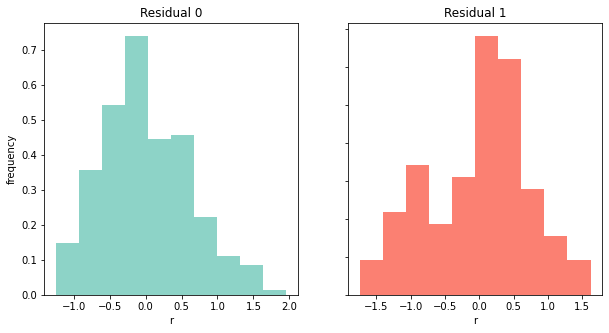

In [14]:
viz.plot_residuals(residuals)

In [15]:
X_r, Y_r, _ = intest.partition_data(y, x)

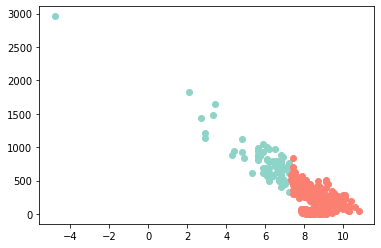

In [16]:
viz.plot_scatters(X_r, Y_r)

In [17]:
residualsr, Y_r, X_r, modelsr = intest.estimate_partitioned_models(y, x)
scorer, pairsr = intest.find_max_discrp(residualsr)

In [18]:
scorer

0.28943850267379667

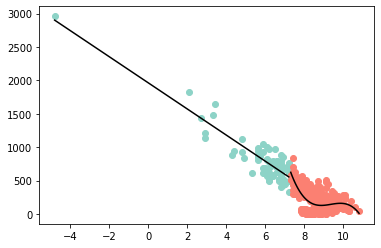

In [19]:
viz.plot_models(Y_r, X_r, modelsr)

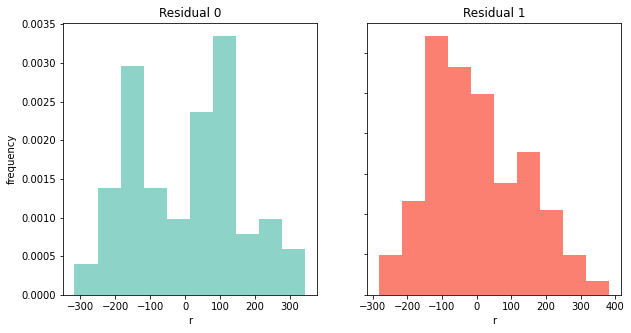

In [20]:
viz.plot_residuals(residualsr)

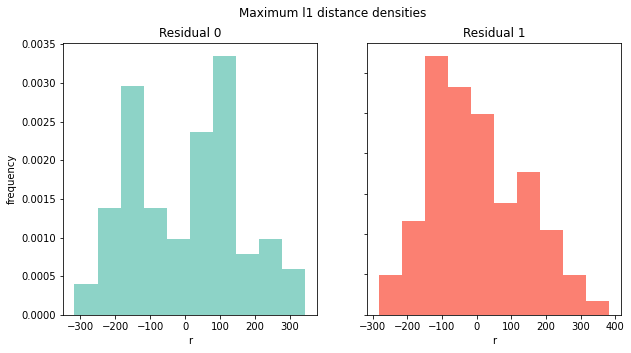

In [21]:
viz.plot_residuals(residualsr, res_filter=pairsr, title='Maximum l1 distance densities')

In [22]:
print('X -> Y', score)

X -> Y 0.24020092226613973


In [23]:
print('X <- Y', scorer)

X <- Y 0.28943850267379667


In [24]:
# avg dist to avg
# can use models to easily compute an estimate cheaply (add point and degree-> regress)
# var / moment est for low sample regime

# discretise based on largest support (min, max) , see hist param

In [25]:
print('predicted:', int(score < scorer))

predicted: 1


In [26]:
print('Truth:', target)

Truth: 1
